<a href="https://colab.research.google.com/github/franckepeixoto/IGTI-Analista-de-Machine-Learning/blob/main/IGTI_Desafio_Modelos_Preditivos_e_S%C3%A9ries_Temporais_(M%C3%B3dulo_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos
> * Análise exploratória de dados (EDA - Exploratory Data Analysis)
> * Comparação e treinamento de modelos de classificação

## Enunciado
*Neste desafio, serão abordados conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT).*
> Será utilizado o dataset **Banknote authetication**,
disponível no UCI Machine Learning Repository 

<img src="https://storage.googleapis.com/kaggle-datasets-images/631969/1124426/f0ef7741a1a189f4c089103520b29832/dataset-cover.jpg?t=2020-05-02-13-31-16" height="100px" align="left" hspace="4px" alt="New"></img>

[**Banknote Authentication Dataset**](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

Este dataset consiste de atributos contínuos
> * variance
> * skewness
> * curtosis
> * entropy

Extraídos de imagens de **cédulas reais** e **falsificadas** através de uma etapa de
processamento de sinais **(transformação de Wavelet)**, além da indicação se o exemplo é de uma cédula **genuína** (class = **0**) ou **falsificada** (class = **1**).


# Atividades

### Carregar e dividir os dados; e  implementação dos algoritmos
Divida o dataset utilizando a função train_test_split, conforme:
* a. Conjunto de treino (70%)
* b. Conjunto de teste (30%)
* c. random_state=1

In [ ]:
import numpy as np
import pandas as pd
names = ['variance','skewness','curtosis','entropy','class']
dataset = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', header=None, names=names) 
dataset.tail(2)

,variance,skewness,curtosis,entropy,class
1370,-3.5637,-8.38270,12.3930,-1.2823,1
1371,-2.5419,-0.65804,2.6842,1.1952,1


*Utilize a variável **class** como saída e as demais como entrada dos modelos*

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:,:-1]
index_class = len(dataset.columns)-1
y = dataset.iloc[:,index_class]
print("y \t =\t",dataset.columns[index_class])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)
print("train(x) =\t",xtrain.shape,"\ntest (x) =\t", xtest.shape,"\ntrain(y) =\t",ytrain.shape,"\ntest (y) =\t",ytest.shape)

y 	 =	 class
train(x) =	 (960, 4) 
test (x) =	 (412, 4) 
train(y) =	 (960,) 
test (y) =	 (412,)


Para implementação dos algoritmos, utilize as seguintes definições **(do sklearn)**:
* a. Algoritmo KNN
* b. Algoritmo Árvore de Decisão (Decision Tree)
* c. Algoritmo Floresta Aleatória (Random Forest)
* d. Algoritmo SVM
* e. Algoritmo Rede MLP

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

random_state = 1

knn = KNeighborsClassifier(n_neighbors=5)
arvore = DecisionTreeClassifier(random_state=random_state)
floresta = RandomForestClassifier(max_depth=8, random_state=random_state)
svm = SVC(gamma='auto',kernel='rbf', random_state=random_state)
mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs',random_state=random_state)

### Perguntas e Respostas 

Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [ ]:
dataset.shape

(1372, 5)

Qual variável possui o maior range (diferença entre valor máximo e mínimo)?

In [ ]:
describe = dataset.describe().loc[['max','min']]
describe.loc['range']= describe.loc['max'] - describe.loc['min']
describe.loc['range'].reset_index().sort_values('range', ascending=False) 

,index,range
1,skewness,26.7247
2,curtosis,23.2135
0,variance,13.8669
3,entropy,10.9977
4,class,1.0000


Qual a média da coluna skewness?

In [ ]:
dataset.skewness.mean()

1.9223531206393603

Qual a média da coluna entropy?

In [ ]:
dataset.entropy.mean()

-1.191656520043731

Qual a mediana da coluna variance?

In [ ]:
dataset.variance.median()

0.49618

Qual a desvio padrão da coluna curtosis?

In [ ]:
dataset.curtosis.std()

4.310030090106595

Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)?

In [ ]:
total = len(dataset['class'])
(len(dataset[dataset['class']==1]['class'])/total)*100

44.460641399416915

Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis?

In [ ]:
corr = dataset[['skewness','curtosis']].corr(method='pearson')
corr[corr<1].values[1][0]

-0.786895224306578

Qual a acurácia do KNN no conjunto de teste?

In [ ]:
from sklearn.metrics import accuracy_score
knn.fit(xtrain,ytrain)
previsoes = knn.predict(xtest)
accuracy_score(ytest, previsoes)

0.9975728155339806

Qual a acurácia da Árvore de Decisão no conjunto de teste?

In [ ]:
arvore.fit(xtrain,ytrain)
previsoes = arvore.predict(xtest)
accuracy_score(ytest, previsoes)

0.9878640776699029

Qual a acurácia do Random Forest no conjunto de teste?

In [ ]:
floresta.fit(xtrain,ytrain)
previsoes = floresta.predict(xtest)
accuracy_score(ytest, previsoes)

0.9951456310679612

Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class?

In [ ]:
evidencia = pd.DataFrame({'score': floresta.feature_importances_ },index=xtrain.columns)
evidencia.sort_values('score', ascending=False)

,score
variance,0.560667
skewness,0.240586
curtosis,0.140228
entropy,0.058519


Qual o valor da importância relativa da feature skewness?

In [ ]:
evidencia.loc['skewness']

score    0.240586
Name: skewness, dtype: float64

In [ ]:
Qual a acurácia do SVM no conjunto de teste?

In [ ]:
svm.fit(xtrain,ytrain)
previsoes = svm.predict(xtest)
accuracy_score(ytest, previsoes)

1.0

Qual a acurácia da rede MLP no conjunto de teste?


In [ ]:
mlp.fit(xtrain,ytrain)
previsoes = mlp.predict(xtest)
accuracy_score(ytest, previsoes)

1.0

# Passa tempo

numpy: https://www.kaggle.com/franckepeixoto/numpy-conceitos-b-sicos

In [145]:
import matplotlib.pyplot as plt
l = 50
data = pd.DataFrame({"x":np.random.rand(l), "y": np.random.rand(l)})
data.y = data.y*100
data.x = data.x*100
data.x = data.x.astype(dtype='int')
data.y = data.y.astype(dtype='int')
data.head(3)

,x,y
0,81,13
1,12,43
2,70,87


In [146]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

centroides = kmeans.cluster_centers_
centroides

array([[81.18181818, 73.54545455],
       [19.        , 34.22222222],
       [70.64285714, 16.64285714],
       [36.0625    , 80.25      ]])

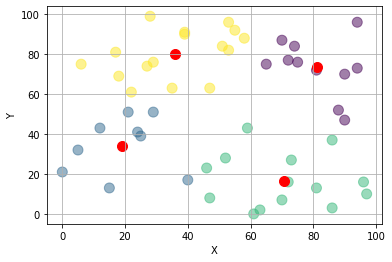

In [147]:
plt.clf()
plt.scatter(data.x,data.y, c=kmeans.labels_.astype(int), s=100, alpha=0.5)
plt.scatter(centroides[:,0], centroides[:,1], c='red', s=100)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)